## Predictive model for forecasting sales
This proejct involves building a machine learning model to predict a target variable bsaed on a set of input features. It showcase a basic machine learning workflow. The primary goal here is to learn how well the model performs in making prediction

In [6]:
!pip install seaborn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sb
# from sklearn.impute import SimpleImputer

## Loading data
Here, the dataset is being loaded from a CSV file (sales.csv). Then, the features  and target are assigned. In this case, the target represents the variable we want to predict (such as sales categories).

**Note: The dataset sales.csv is used from kaggle website.**|

In [8]:
dataset = pd.read_csv("sales.csv")

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
dataset.shape

(200, 5)

In [12]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


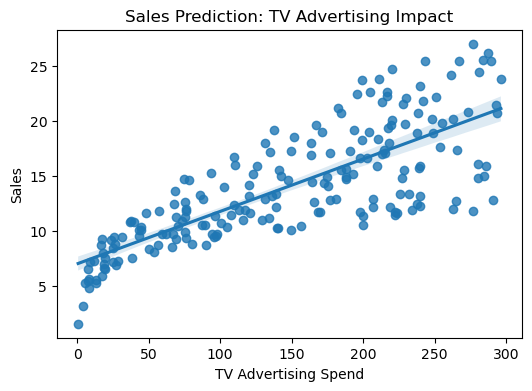

In [13]:
plt.figure(figsize=(6,4))
sb.regplot(x=dataset['TV'], y=dataset['Sales'])
plt.title('Sales Prediction: TV Advertising Impact')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()

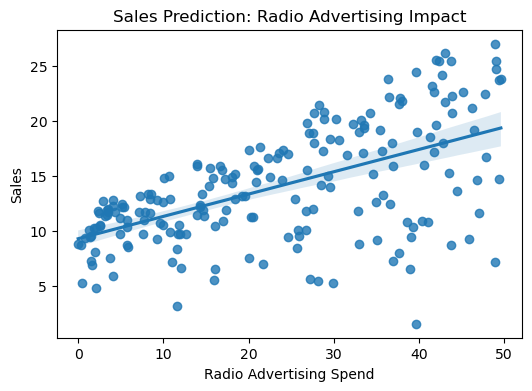

In [14]:
plt.figure(figsize=(6,4))
sb.regplot(x=dataset['Radio'], y=dataset['Sales'])
plt.title('Sales Prediction: Radio Advertising Impact')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.show()

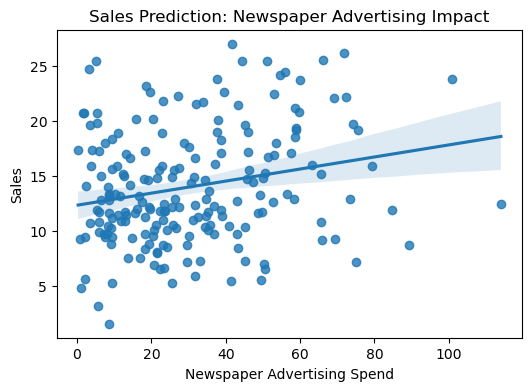

In [15]:
plt.figure(figsize=(6,4))
sb.regplot(x=dataset['Newspaper'], y=dataset['Sales'])
plt.title('Sales Prediction: Newspaper Advertising Impact')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.show()

In [16]:
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [17]:
X = dataset.iloc[:,:-1].values

In [18]:
X

array([[  1. , 230.1,  37.8,  69.2],
       [  2. ,  44.5,  39.3,  45.1],
       [  3. ,  17.2,  45.9,  69.3],
       [  4. , 151.5,  41.3,  58.5],
       [  5. , 180.8,  10.8,  58.4],
       [  6. ,   8.7,  48.9,  75. ],
       [  7. ,  57.5,  32.8,  23.5],
       [  8. , 120.2,  19.6,  11.6],
       [  9. ,   8.6,   2.1,   1. ],
       [ 10. , 199.8,   2.6,  21.2],
       [ 11. ,  66.1,   5.8,  24.2],
       [ 12. , 214.7,  24. ,   4. ],
       [ 13. ,  23.8,  35.1,  65.9],
       [ 14. ,  97.5,   7.6,   7.2],
       [ 15. , 204.1,  32.9,  46. ],
       [ 16. , 195.4,  47.7,  52.9],
       [ 17. ,  67.8,  36.6, 114. ],
       [ 18. , 281.4,  39.6,  55.8],
       [ 19. ,  69.2,  20.5,  18.3],
       [ 20. , 147.3,  23.9,  19.1],
       [ 21. , 218.4,  27.7,  53.4],
       [ 22. , 237.4,   5.1,  23.5],
       [ 23. ,  13.2,  15.9,  49.6],
       [ 24. , 228.3,  16.9,  26.2],
       [ 25. ,  62.3,  12.6,  18.3],
       [ 26. , 262.9,   3.5,  19.5],
       [ 27. , 142.9,  29.3,  12.6],
 

In [19]:
y = dataset.iloc[:,-1].values

In [20]:
y.shape

(200,)

## Train_test_split
The code below splits the data into 80% training and 20% testing which is a standard prac
tice to evaluate the model's ability

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 0)

## Using Linear Regression
Since, the goal of this project is to predict a continous target variable lets says  **sales** based on input features **TV, Radio and Newspaper advertising** linear regression would be appropriate approach.
Linear regression is a statistical method used for regression tasks where the target varibale is numerical(sales).

In the dataset I have taken we are suppose to predict sales based on advertising spending. This depicts a linear relationship. To give an example, if advertising spending on TV increase, it is likely that sales will also increase, making a linear model appropriate.

Furthermore, linear regression is simple to implement and efficient. Dataset appears to have a reasonable structure for such a model, it is a good choice for a baseline predictive model.

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([10.24664397,  7.3067958 ,  7.01313011, 24.0629912 , 11.84538583,
        6.3623126 , 12.97367539, 15.01392577, 10.95137181, 16.2302401 ,
       22.94764396,  9.07892877, 10.29830431, 15.372556  , 11.63358138,
       12.38729183, 18.91996453, 10.72601207, 16.03372676, 17.36589369,
       23.85225051,  9.51048184, 15.25366204, 12.2528663 ,  5.81346738,
       15.19998588, 12.12398331, 20.74762723, 13.36651757,  9.16548788,
       13.0430809 , 21.47977498, 18.01828076, 21.14170908,  6.74096317,
        5.9527019 ,  7.82515133, 13.21661502, 14.72150697,  6.18172688])

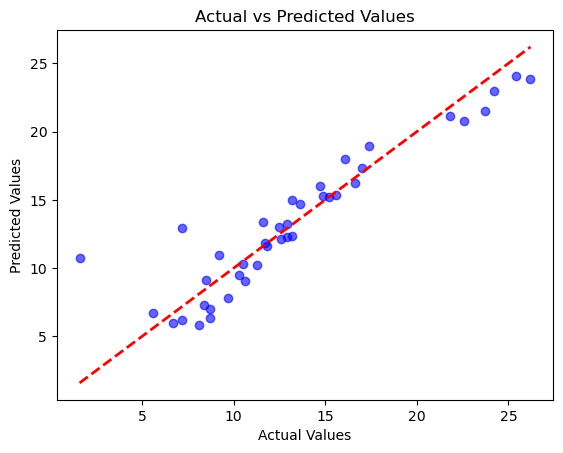

In [26]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45° line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## Model evaluation
**MSE** measures the average squared difference between actual and predicted values (lower is better).

Formula:
            $MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

 Where:

- $n$ is the number of data points (samples),
- $y_i$ is the actual value (ground truth) for the $i$-th observation,
- $\hat{y}_i$ is the predicted value for the $i$-th observation.

**R-squared** gives an indication of how well the model explains the variance in the target variable (Sales), with values closer to 1 indicating better fit.

Formula:
             $R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$
             
Where:

-$n$ is the number of data points,
-$y_i$ is the actual value for the $i$-th observation,
-$\hat{y_i}$ is the predicted value for the $i$-th observation,
-$\bar{y}$ is the mean of the actual values ($\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$).

Interpretation of $R^2$:

-$R^2 = 1$: The model perfectly explains the variance in the data.
-$R^2 = 0$: The model does not explain any of the variance, meaning it performs no better than                      just predicting the mean of the target variable.
-$R^2 < 0$: The model performs worse than simply predicting the mean.


**RMSE** The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values.
Formula:
              $RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}$

Where:

- $MSE$ is the Mean Squared Error (as defined above),
- The square root is applied to bring the error back into the original units of the target variable.



In [27]:
mae = metrics.mean_absolute_error(y_pred,y_test)
rmse = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
r2 = metrics.r2_score(y_pred,y_test)

In [28]:
print(f"Mean Absolute Error (MAE):{mae}")
print(f"Root Mean Absolute Error (RMSE):{rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE):1.4158480868317491
Root Mean Absolute Error (RMSE):2.1252030072958723
R-squared (R²): 0.8283777385812963


## Part 2

## Applying marginal likelihood estimation in Sales forecasting
In this task, you're using Bayesian Ridge Regression to perform regression analysis, which involves predicting continuous values based on input data.



In [30]:
from sklearn.linear_model import BayesianRidge

## Model initialization and training
Bayesian Ridge Regression is a type of linear regression that models uncertainty by incorporating a probabilistic approach. Instead of providing a single prediction, it estimates the mean and variance of the predicted values, capturing the uncertainty of those predictions.

The model is trained using the training data (X_train, y_train). This means it learns the relationship between the features (inputs) and the target variable (output) in a probabilistic sense, accounting for both the data and the prior distributions on the parameters.


In [31]:
#Train the Bayesian Ridge model implementing marginal likelihood
model = BayesianRidge()
model.fit(X_train,y_train)

BayesianRidge()

## Making prediction
Once the model is trained, it can be used to predict values for new, unseen data (X_test). In Bayesian Ridge Regression, this doesn't just give you a single predicted value but gives you a mean (central tendency) of the predicted value based on the model's learned distribution.


In [64]:
y_predictions = model.predict(X_test)
y_prediction_mean = y_predictions

## Prediction Uncertainty
Variance represents the uncertainty or confidence in the predictions. model.sigma_ holds the variance values for the predictions. A high variance means the model is less confident about the prediction, while a low variance indicates higher confidence.

The Bayesian framework estimates this variance based on the data's characteristics and the model's assumptions about the underlying distribution of the data.

In [60]:
y_prediction_variance = model.sigma_

In [66]:
print("Predicted values (Mean):", y_prediction_mean)
print("Prediction Uncertainty (Variance):", y_prediction_variance)

Predicted values (Mean): [10.2483059   7.32102025  7.04681717 24.04010354 11.87044579  6.38951741
 12.95205243 15.03010943 10.94770757 16.22387675 22.9259401   9.0956266
 10.32196039 15.36799113 11.62643361 12.38767662 18.91435194 10.69420094
 16.00013619 17.3577241  23.83481187  9.53591973 15.25583075 12.26176826
  5.84460572 15.17633761 12.13941718 20.70906342 13.39307994  9.16806268
 13.05376067 21.4501179  18.03392181 21.11581023  6.76123931  5.96799295
  7.84781336 13.24676534 14.6915483   6.20167022]
Prediction Uncertainty (Variance): [[ 4.75934432e-06  9.77789558e-08  5.16314174e-07  8.74331169e-07]
 [ 9.77789558e-08  2.16501080e-06 -1.07258306e-07 -8.98475003e-07]
 [ 5.16314174e-07 -1.07258306e-07  7.87035381e-05 -1.72436167e-05]
 [ 8.74331169e-07 -8.98475003e-07 -1.72436167e-05  3.78221169e-05]]
